## Q1 a) Create conv2 function from scratch

In [1]:
import cv2
import numpy as np
import cmath

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import Image

%matplotlib inline

In [4]:
print(cv2.__version__)

4.5.3


The Padding function takes in an imput image, kernel dimensions and the padding type (0,1,2,3) as input and provides the padded image as the output.
There are Four different types of padding:
0 -> Zero Padding
1 -> Wrap around
2 -> Copy edge
3 -> Reflect edge

In [49]:
#pad is value of padding and is initialized to zero
#kernel_rows
#kernel_cols

def padding(input_image, pad = 0, w_r = 0, w_c = 0):
    '''
    Takes input image and kernel dimensions and the pad type(takes in integer values 0,1,2,3)
    and returns padded image as output.
    For even kernel dimensions such as 2x2, the bottom right pixel is considered as the center.
    
    pad = 0 -> zero padding
    pad = 1 -> wrap around
    pad = 2 -> copy edge
    pad = 3 -> reflect across edge
    '''
    

    
    #individual padding values for rows
    top_row_pad_value = int(np.ceil((w_r-1)/2))
    bottom_row_pad_value = int(np.floor((w_r-1)/2))
    
    #individual padding values for cols
    left_col_pad_value = int(np.ceil((w_c-1)/2))
    right_col_pad_value = int(np.floor((w_c-1)/2))
    
    if pad == 0:  #zero padding
        
        padded_dims = (input_image.shape[0] + top_row_pad_value + bottom_row_pad_value, 
                       input_image.shape[1] + left_col_pad_value + right_col_pad_value)
        
        
        padded_image = np.zeros(padded_dims)
        print("Dimensions of the padded image:", padded_image.shape)
        
        #Fitting the original image to the padded image
        padded_image[top_row_pad_value : top_row_pad_value + input_image.shape[0], 
                     left_col_pad_value : left_col_pad_value + input_image.shape[1]] = input_image
        
    elif pad == 1:   #wrap around
        
       
        padded_dims = (input_image.shape[0] + top_row_pad_value + bottom_row_pad_value, 
                       input_image.shape[1] + left_col_pad_value + right_col_pad_value)
        
        
        padded_image = np.zeros(padded_dims)
        print("Dimensions of the padded image:", padded_image.shape)
        
        #Fitting the original image to the padded image
        padded_image[top_row_pad_value : top_row_pad_value + input_image.shape[0], 
                     left_col_pad_value : left_col_pad_value + input_image.shape[1]] = input_image
        
        
        #upper most row padding
        if top_row_pad_value != 0:
            padded_image[0 : top_row_pad_value, : ] = padded_image[-1*(top_row_pad_value+bottom_row_pad_value)
                                                                   : top_row_pad_value + input_image.shape[0], : ]
        #lowest row padding
        if bottom_row_pad_value != 0:
            padded_image[-1*(bottom_row_pad_value) : , : ] = padded_image[top_row_pad_value
                                                                          : top_row_pad_value + bottom_row_pad_value, :]
        #right most column padding
        if right_col_pad_value != 0:
            padded_image[ : ,-1*(right_col_pad_value) : ] = padded_image[ : ,left_col_pad_value 
                                                                         : left_col_pad_value + right_col_pad_value]
        #left most column padding
        if left_col_pad_value != 0:
            padded_image[ : ,0 : left_col_pad_value] = padded_image[ : ,-1*(left_col_pad_value+right_col_pad_value)
                                                                    : left_col_pad_value + input_image.shape[1]]
    
    elif pad == 2:    #copy edge        
        
        padded_dims = (input_image.shape[0] + top_row_pad_value + bottom_row_pad_value, 
                       input_image.shape[1] + left_col_pad_value + right_col_pad_value)
        
        #print(padded_dims)
        padded_image = np.zeros(padded_dims)#.astype(int)
        print("Dimensions of the padded image:", padded_image.shape)
        
        #Fitting the original image to the padded image
        padded_image[top_row_pad_value : top_row_pad_value + input_image.shape[0], 
                     left_col_pad_value : left_col_pad_value + input_image.shape[1]] = input_image
        
        
        #upper most row padding
        if top_row_pad_value != 0:
            padded_image[0 : top_row_pad_value, : ] = padded_image[[top_row_pad_value], : ]
        #lowest row padding
        if bottom_row_pad_value != 0:
            padded_image[-1*(bottom_row_pad_value) : , : ] = padded_image[[-1*bottom_row_pad_value-1], :]
        #right most column padding
        if right_col_pad_value != 0:
            padded_image[ : ,-1*(right_col_pad_value) : ] = padded_image[ : ,[-1*(right_col_pad_value)-1]]
        #left most column padding
        if left_col_pad_value != 0:
            padded_image[ : ,0 : left_col_pad_value] = padded_image[ : ,[left_col_pad_value]]
            
    elif pad == 3:     #reflect across edge
    
        padded_dims = (input_image.shape[0] + top_row_pad_value + bottom_row_pad_value, 
                       input_image.shape[1] + left_col_pad_value + right_col_pad_value)

        
        padded_image = np.zeros(padded_dims)#.astype(int)
        print("Dimensions of the padded image:", padded_image.shape)

        #Fitting the original image to the padded image
        padded_image[top_row_pad_value : top_row_pad_value + input_image.shape[0], 
                     left_col_pad_value : left_col_pad_value + input_image.shape[1]] = input_image


        #upper most row padding
        if top_row_pad_value != 0:
            padded_image[0 : top_row_pad_value, : ] = np.flip(padded_image[top_row_pad_value 
                                                                           : 2*top_row_pad_value, :],axis = 0)
        #lowest row padding
        if bottom_row_pad_value != 0:
            padded_image[-1*(bottom_row_pad_value) : , : ] = np.flip(padded_image[-2*(bottom_row_pad_value)
                                                                                  : -1*(bottom_row_pad_value), : ], axis = 0)
        #right most column padding
        if right_col_pad_value != 0:
            padded_image[ : ,-1*(right_col_pad_value) : ] = np.flip(padded_image[ : ,-2*(right_col_pad_value)
                                                                                 : -1*(right_col_pad_value)], axis = 1)
        #left most column padding
        if left_col_pad_value != 0:
            padded_image[ : ,0 : left_col_pad_value] = np.flip(padded_image[ : ,left_col_pad_value
                                                                            : 2* left_col_pad_value], axis = 1)

    return padded_image

The next function performs the convolution operation between the image slice and the kernel and returns a number to be appended to the corresponding pixel in the output image. This function is called in the conv2 function.

In [11]:
def convolution(f,w):
    return np.sum(f*w)

The conv2 function takes in f (Grayscale or BGR image), w (filter) and the padding type (as integer) and returns the convoluted image. 
If the image is a BGR image, then this function will split the image into separate channels, apply padding and convolution individually and then merge them together.
The image is first padded according to the kernel size so as to get the output image whose dimensions are the same as the input image (Performing 'SAME' convolution), and then convolution(f,w) is called and the resultant value is stored for every pixel of the output image.

In [12]:
def conv2(f,w,pad = 0):
    
    if len(f.shape)< 3:  #If image is grayscale
        
        image_padded = padding(f, pad, w.shape[0], w.shape[1])
        #print("Dimensions of padded image:", image_padded.shape)
        #plt.imshow(image_padded)
        #plt.show()
        
        conv_image = np.zeros((f.shape[0], f.shape[1]))
        
        for row in range(conv_image.shape[0]):
            
            for col in range(conv_image.shape[1]):
                
                conv_image[row][col] = convolution(image_padded[row:row+w.shape[0],col:col+w.shape[1]],w)
        return conv_image
                
        
    elif len(f.shape) == 3:  
#If image is color image, then split into different channels and perform padding and the convolution operations separately
        
        b,g,r = cv2.split(f)
        
        image_padded_b = padding(b, pad, w.shape[0], w.shape[1]) 
        image_padded_g = padding(g, pad, w.shape[0], w.shape[1]) 
        image_padded_r = padding(r, pad, w.shape[0], w.shape[1])
        
        conv_image_b = np.zeros((b.shape[0],b.shape[1]))
        conv_image_g = np.zeros((g.shape[0],g.shape[1]))
        conv_image_r = np.zeros((r.shape[0],r.shape[1]))
        
        for row in range(conv_image_b.shape[0]):
            
            for col in range(conv_image_b.shape[1]):
                
                conv_image_b[row][col] = convolution(image_padded_b[row:row + w.shape[0], col:col+w.shape[1]],w)
                conv_image_g[row][col] = convolution(image_padded_g[row:row + w.shape[0], col:col+w.shape[1]],w)
                conv_image_r[row][col] = convolution(image_padded_r[row:row + w.shape[0], col:col+w.shape[1]],w)
                
        conv_image = cv2.merge((conv_image_b,conv_image_g,conv_image_r)).astype(np.uint8)
        return conv_image
        
    

In [13]:
lena = cv2.imread('./lena.png')
gray_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

Dimensions of the padded image: (444, 444)
Dimensions of the padded image: (440, 441)
Dimensions of the padded image: (441, 440)
Dimensions of the padded image: (442, 442)
Dimensions of the padded image: (442, 442)
Dimensions of the padded image: (442, 442)
Dimensions of the padded image: (442, 442)
Dimensions of the padded image: (441, 441)
Dimensions of the padded image: (441, 441)


Text(0.5, 1.0, 'Roberts-y filter')

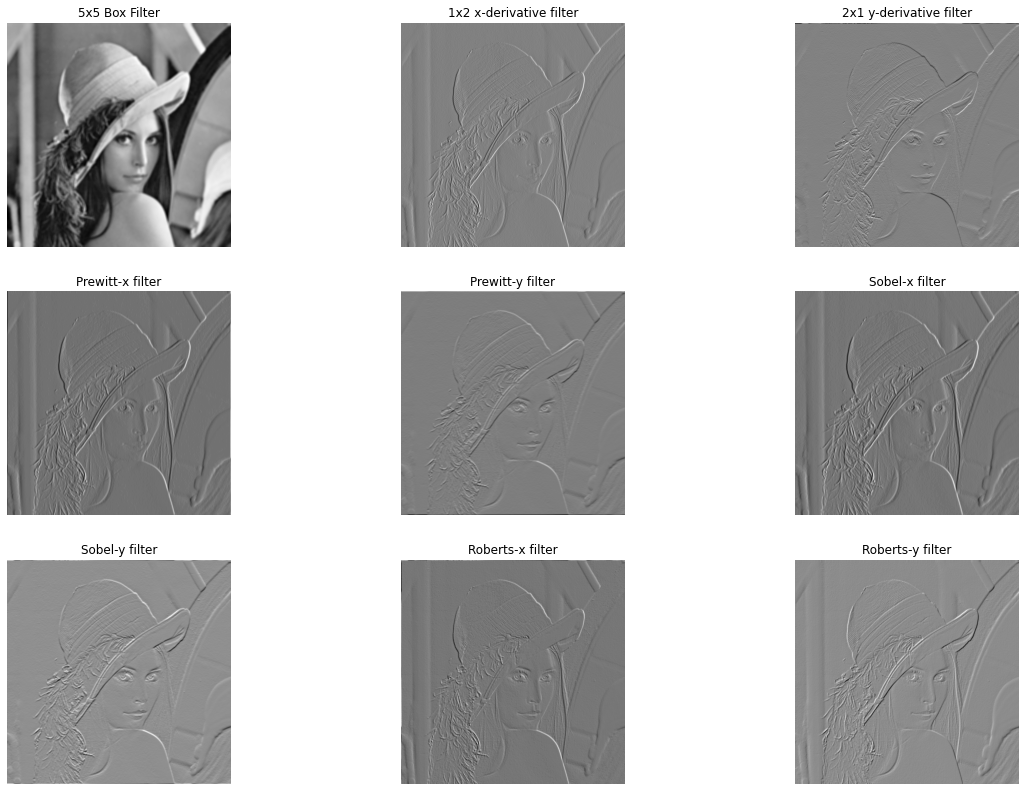

In [15]:
#Applying all nine filters mentioned in the question
w1 = (1/25)*np.ones((5,5))   # 5x5 Box(Average) Filter
w2_x = np.array([[-1,1]])   # 1x2 x-derivative filter
w2_y = np.array([[-1],[1]])  # 2x1 y-derivative filter
w3_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])  # Prewitt-x filter
w3_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])  # Prewitt-y filter
w4_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])  # Sobel-x filter
w4_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])  # Sobel-y filter
w5_x = np.array([[0,1],[-1,0]])  # Roberts-x filter
w5_y = np.array([[1,0],[0,-1]])  # Roberts-y filter

g1 = conv2(gray_lena,w1,3)
g2_x = conv2(gray_lena,w2_x,2) 
g2_y = conv2(gray_lena,w2_y,1) 
g3_x = conv2(gray_lena,w3_x,0) 
g3_y = conv2(gray_lena,w3_y,0) 
g4_x = conv2(gray_lena,w4_x,2) 
g4_y = conv2(gray_lena,w4_y,1) 
g5_x = conv2(gray_lena,w5_x,1) 
g5_y = conv2(gray_lena,w5_y,3) 

f = plt.figure(figsize=(20,14))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)

ax1.imshow(g1,cmap = 'gray')
ax1.axis('off')
ax1.set_title('5x5 Box Filter')
ax2.imshow(g2_x,cmap = 'binary')
ax2.axis('off')
ax2.set_title('1x2 x-derivative filter')
ax3.imshow(g2_y,cmap = 'binary')
ax3.axis('off')
ax3.set_title('2x1 y-derivative filter')
ax4.imshow(g3_x,cmap = 'binary')
ax4.axis('off')
ax4.set_title('Prewitt-x filter')
ax5.imshow(g3_y,cmap = 'binary')
ax5.axis('off')
ax5.set_title('Prewitt-y filter')
ax6.imshow(g4_x,cmap = 'binary')
ax6.axis('off')
ax6.set_title('Sobel-x filter')
ax7.imshow(g4_y,cmap = 'binary')
ax7.axis('off')
ax7.set_title('Sobel-y filter')
ax8.imshow(g5_x,cmap = 'binary')
ax8.axis('off')
ax8.set_title('Roberts-x filter')
ax9.imshow(g5_y,cmap = 'binary')
ax9.axis('off')
ax9.set_title('Roberts-y filter')

Dimensions of the padded image: (442, 442)
Dimensions of the padded image: (442, 442)
Dimensions of the padded image: (442, 442)
(440, 440) (440, 440, 3)


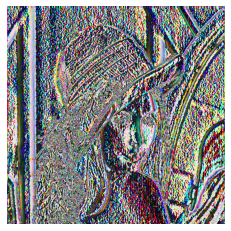

In [47]:
#Convolution of a Color (BGR image)
w = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
g = conv2(image,w,0)   #cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
g_rgb = cv2.cvtColor(g, cv2.COLOR_BGR2RGB)
plt.imshow(g_rgb)
plt.axis('off')
plt.show()

## Q1 b) Creating an 1024x1024 unit impulse image and applying convolution to the image. 

The below code generates an impulse image where the center pixel has value 1 and the rest have value 0. Here the range of the pixel values lies in the range [0,1]

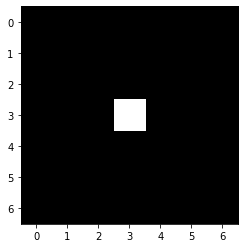

In [16]:
impulse_image = np.zeros((1024,1024))
impulse_image[512,512] = 1
plt.imshow(impulse_image[509:516,509:516], cmap = 'gray')
plt.show()

Applying a 5x5 box filter on the above image will result the neighboring pixels(5x5 neighboorhood) around the center having the averaged values. 

In [17]:
w = 1/25*np.ones((5,5))
impulse_conv = conv2(impulse_image, w, pad = 0)
print("Impulse Image as a numpy matrix - Center Portion")
print(impulse_image[509:516,509:516])    #displaying the central portion of the image for better viewing
print("Convoluted Image as a numpy matrix - Center Portion")
print(impulse_conv[509:516,509:516])

Dimensions of the padded image: (1028, 1028)
Impulse Image as a numpy matrix - Center Portion
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Convoluted Image as a numpy matrix - Center Portion
[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.04 0.04 0.04 0.04 0.04 0.  ]
 [0.   0.04 0.04 0.04 0.04 0.04 0.  ]
 [0.   0.04 0.04 0.04 0.04 0.04 0.  ]
 [0.   0.04 0.04 0.04 0.04 0.04 0.  ]
 [0.   0.04 0.04 0.04 0.04 0.04 0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]


## When we apply the convolution function to a unit impulse image, we get the output image in which the filter itself will be situated at the center of the image. Here, we apply a 5x5 average filter and thus we get all the pixel values in the center 5x5 image section to have the value 0.04 i.e (1/25)

Viewing the convoluted image slice as a grayscale image

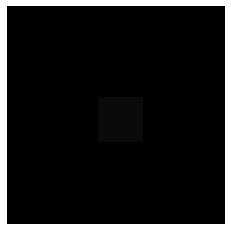

In [19]:
impulse_conv_scaled = impulse_conv*255
plt.imshow(impulse_conv_scaled[500:524,500:524], cmap = 'gray',vmin = 0,vmax = 255)
plt.axis('off')
plt.show()

## Q2 a) Create fft2 using built-in 1-D fft function

The DFT2 function takes in an image f and performs 2D fft and returns a complex 2-D matrix. The function uses an in-built (from numpy) 1-D fft function which is first applied on the rows of the input image and then on the columns of the intermediate result, thus giving the 2-D fft output. The result is also compared with the in-built 2-D fft function for reference. 
This function supports only grayscale images. For color images, this function needs to be applied to each channels individually.

In [20]:
def DFT2(f):    
    fft_image = np.zeros(f.shape,dtype = complex)
    for i in range(f.shape[0]):
        fft_image[i] = np.fft.fft(f[i])  #applying 1-D fft to each row
    fft_image = np.transpose(fft_image)    #This is done so as to apply fft on the columns too
    for j in range(f.shape[1]):
        fft_image[j] = np.fft.fft(fft_image[j])  #applying 1-D fft to each row
    fft_image = np.transpose(fft_image)
    return fft_image
    

The scale_image function is a transformation function which scales the image pixel values to a desired range. In this case, the image is scaled from [0,255] to [0,1] for the DFT2 operation

In [21]:
def scale_image(f,lmin,lmax,rmin,rmax):
    return (lmax-lmin)*(f/(rmax-rmin))

In [22]:
lena = cv2.imread('./lena.png')
gray_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)   #converting into grayscale image
scaled_lena = scale_image(gray_lena,0,1,0,255)  #scaling down the image to perform DFT2 operation

Text(0.5, 1.0, 'Phase')

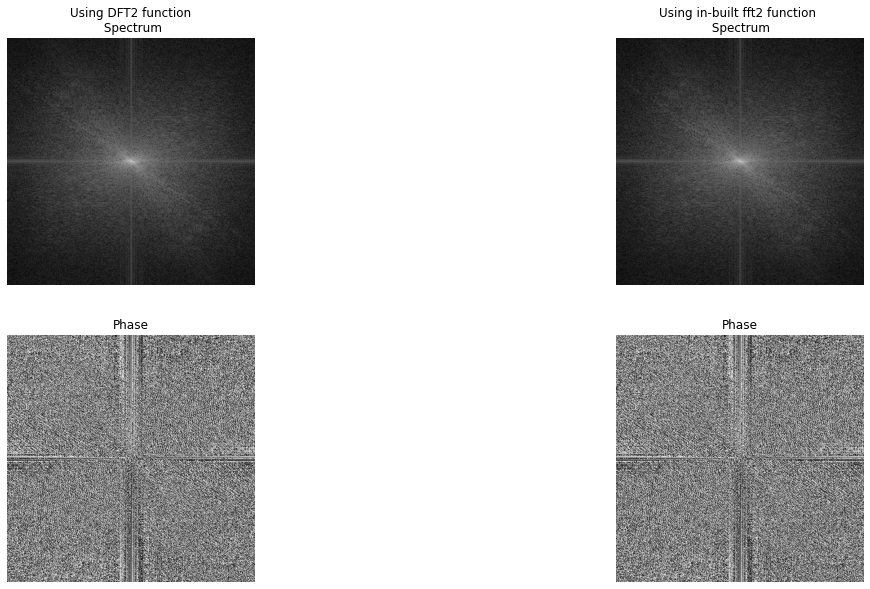

In [50]:
#fft of a gray scale lena
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

s = DFT2(scaled_lena)   
s_shift = np.fft.fftshift(s)   #This function shifts the zero-frequency component to the center of the spectrum.
s_log = np.log(1+np.abs(s_shift))  #Expands the dark pixels in the image while compressing the brighter pixels
s_log_phase = np.angle(s_shift)

ax.imshow(s_log,cmap = 'gray')
ax.axis('off')
ax.set_title('Using DFT2 function\n Spectrum')

ax3.imshow(s_log_phase,cmap = 'gray')
ax3.axis('off')
ax3.set_title('Phase')

#fft of the gray scale image using inbuilt fft2 function
s_a = np.fft.fft2(scaled_lena)   
s_a_shift = np.fft.fftshift(s_a)
s_loga = np.log(1+np.abs(s_a_shift))
s_loga_phase = np.angle(s_a_shift)

ax2.imshow(s_loga,cmap = 'gray')
ax2.axis('off')
ax2.set_title('Using in-built fft2 function \n Spectrum')

ax4.imshow(s_loga_phase,cmap = 'gray')
ax4.axis('off')
ax4.set_title('Phase')


Applying FFT for wolves.png image

In [26]:
wolves = cv2.imread('./wolves.png')
gray_wolves = cv2.cvtColor(wolves, cv2.COLOR_BGR2GRAY)   #converting into grayscale image
scaled_wolves = scale_image(gray_wolves,0,1,0,255)  #scaling down the image to perform DFT2 operation

Text(0.5, 1.0, 'Phase')

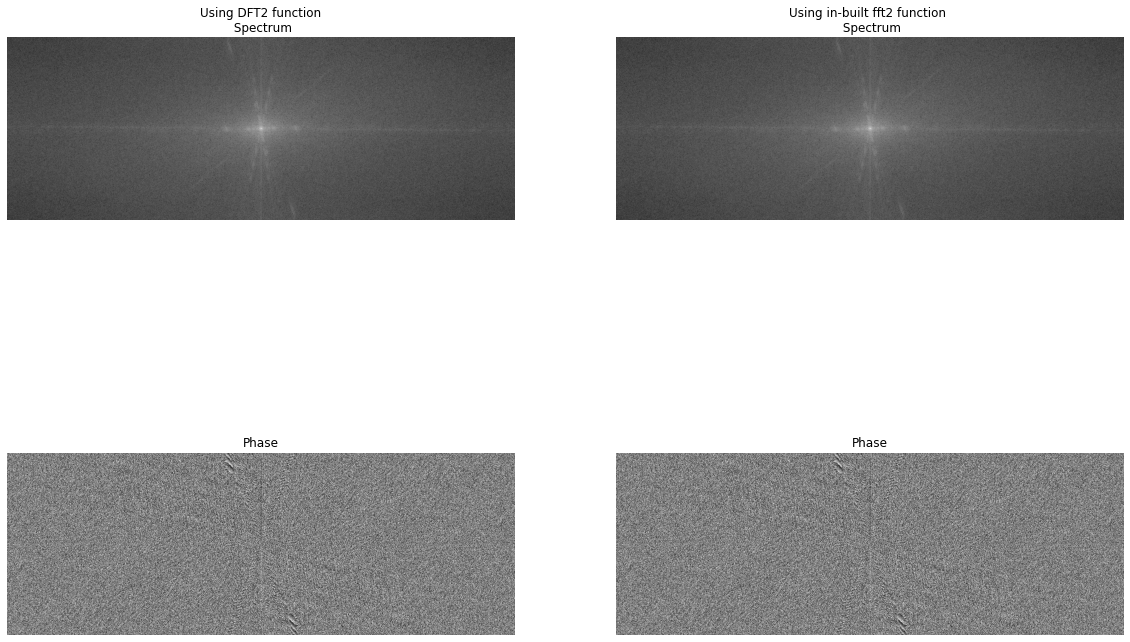

In [37]:
#fft of a gray scale wolves
f = plt.figure(figsize=(20,14))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

s_w = DFT2(scaled_wolves)   
s_shift_w = np.fft.fftshift(s_w)   #This function shifts the zero-frequency component to the center of the spectrum.
s_log_w = np.log(1+np.abs(s_shift_w))  #Expands the dark pixels in the image while compressing the brighter pixels
s_log_phase_w = np.angle(s_shift_w)

ax.imshow(s_log_w,cmap = 'gray')
ax.axis('off')
ax.set_title('Using DFT2 function\n Spectrum')

ax3.imshow(s_log_phase_w,cmap = 'gray')
ax3.axis('off')
ax3.set_title('Phase')

#fft of the gray scale image using inbuilt fft2 function
s_a_w = np.fft.fft2(scaled_wolves)   
s_a_shift_w = np.fft.fftshift(s_a_w)
s_loga_w = np.log(1+np.abs(s_a_shift_w))
s_loga_phase_w = np.angle(s_a_shift_w)

ax2.imshow(s_loga_w,cmap = 'gray')
ax2.axis('off')
ax2.set_title('Using in-built fft2 function \n Spectrum')

ax4.imshow(s_loga_phase_w,cmap = 'gray')
ax4.axis('off')
ax4.set_title('Phase')


## Q2 b) Ifft function (IDFT2) using DFT2 function

The inverse fast fourier transform uses the custom DFT2 function to give the ifft of the input image.

In [31]:
def IDFT2(F):
    swap_fft = np.imag(F) + 1j*np.real(F)
    swap_ifft = DFT2(swap_fft)
    f_ifft = np.imag(swap_ifft) + 1j*np.real(swap_ifft)
    return np.real(f_ifft/(F.shape[0]*F.shape[1]))

Using the output of the DFT2 operation on the scaled down version of the grayscale lena image and obtaining the IFFT.

In [41]:
final_lena = IDFT2(s)   #s is the output of the DFT2 function for lena image

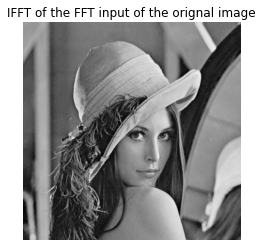

In [42]:
plt.imshow(final_lena,cmap = 'gray')
plt.axis('off')
plt.title("IFFT of the FFT input of the orignal image")
plt.show()

Calculating the difference between the orignal input image(the scaled down version) and the output of the IFFT2 function.

In [43]:
print((scaled_lena - final_lena).astype(np.uint8))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


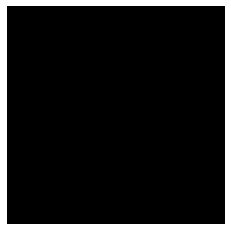

In [44]:
plt.imshow((scaled_lena - final_lena).astype(np.uint8),cmap = 'gray')   #plotting the difference of the two images which leads to a black image
plt.axis('off')
plt.show()

In [45]:
final_wolves = IDFT2(s_w)   #s_w is the output of the DFT2 function for wolves image

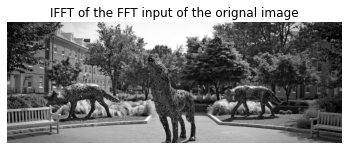

In [46]:
plt.imshow(final_wolves,cmap = 'gray')
plt.axis('off')
plt.title("IFFT of the FFT input of the orignal image")
plt.show()

In [47]:
print((scaled_wolves - final_wolves).astype(np.uint8))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


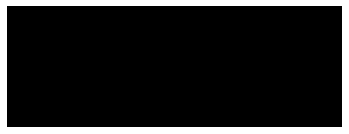

In [48]:
plt.imshow((scaled_wolves - final_wolves).astype(np.uint8),cmap = 'gray')   #plotting the difference of the two images which leads to a black image
plt.axis('off')
plt.show()